## ЗАДАНИЕ №6

Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, fetch_california_housing
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

In [3]:
# Создание синтетического датасета для классификации
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение параметров для подбора
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Создание модели SVM
svm_model = SVC()

# Подбор оптимальных параметров с использованием GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Вывод результатов подбора
print("Наилучшие параметры:", grid_search.best_params_)
print("Наилучшая точность:", grid_search.best_score_)

# Применение наилучшей модели к тестовому набору
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

# Оценка точности на тестовом наборе
accuracy = accuracy_score(y_test, y_pred)
print("Точность на тестовом наборе:", accuracy)

Наилучшие параметры: {'C': 100, 'kernel': 'rbf'}
Наилучшая точность: 0.8737499999999999
Точность на тестовом наборе: 0.875


## ЗАДАНИЕ №7

Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [5]:
# Создание датасета с большим количеством точек
X_large, y_large = make_classification(n_samples=10000, n_features=5, random_state=42)

# Разделение на обучающий и тестовый наборы
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(X_large, y_large, test_size=0.2, random_state=42)

# Создание SVM модели с полиномиальным ядром (можно изменить ядро и параметры)
svm_model_large = SVC(kernel='poly', degree=3, C=1)

# Замер времени начала обучения
start_time_large = time.time()

# Обучение модели на большом датасете
svm_model_large.fit(X_train_large, y_train_large)

# Замер времени окончания обучения
end_time_large = time.time()

# Вывод времени обучения
training_time_large = end_time_large - start_time_large
print(f"Время обучения на большом датасете: {training_time_large:.4f} секунд")


Время обучения на большом датасете: 0.7542 секунд


In [4]:
# Создание датасета с большим количеством точек
X_large, y_large = make_classification(n_samples=100000, n_features=5, random_state=42)

# Разделение на обучающий и тестовый наборы
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(X_large, y_large, test_size=0.2, random_state=42)

# Создание SVM модели с полиномиальным ядром (можно изменить ядро и параметры)
svm_model_large = SVC(kernel='poly', degree=3, C=1)

# Замер времени начала обучения
start_time_large = time.time()

# Обучение модели на большом датасете
svm_model_large.fit(X_train_large, y_train_large)

# Замер времени окончания обучения
end_time_large = time.time()

# Вывод времени обучения
training_time_large = end_time_large - start_time_large
print(f"Время обучения на большом датасете: {training_time_large:.4f} секунд")


Время обучения на большом датасете: 71.5430 секунд


## ЗАДАНИЕ №8

Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

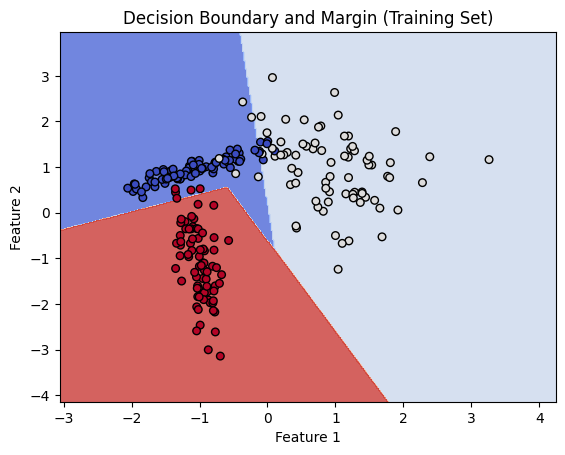

Accuracy on Test Set: 0.90


In [6]:
# Создание сгенерированного датасета
X, y = datasets.make_classification(n_samples=300, n_features=2, n_informative=2,
                                    n_redundant=0, n_classes=3, n_clusters_per_class=1,
                                    random_state=42)

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Визуализация границы принятия решений и зазора
def plot_decision_boundary(X, y, model, title):
    h = .02  # Шаг сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=30)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Визуализация границы принятия решений и зазора
plot_decision_boundary(X_train, y_train, svm_model, 'Decision Boundary and Margin (Training Set)')

# Оценка точности на тестовом наборе данных
accuracy = svm_model.score(X_test, y_test)
print(f"Accuracy on Test Set: {accuracy:.2f}")

## ЗАДАНИЕ №9

Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

In [10]:
# Загрузка датасета Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели SVM для классификации
svm_model_iris = SVC(kernel='linear', C=1)
svm_model_iris.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = svm_model_iris.predict(X_test)

# Оценка точности и матрицы ошибок
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Точность на тестовом наборе: {accuracy:.2f}")
print("Матрица ошибок:")
print(conf_matrix)

Точность на тестовом наборе: 1.00
Матрица ошибок:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## ЗАДАНИЕ №10

Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [5]:
# Загрузка набора данных по ценам на жилье в Калифорнии
california_housing = fetch_california_housing()
X_regression = california_housing.data
y_regression = california_housing.target

# Разделение набора данных на обучающую и тестовую выборки
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

# Создание и обучение модели SVR для регрессии
svm_model_regression_california = SVR(kernel='linear', C=1)
svm_model_regression_california.fit(X_train_regression, y_train_regression)

# Предсказание на тестовом наборе данных
y_pred_regression_california = svm_model_regression_california.predict(X_test_regression)

# Оценка среднеквадратической ошибки и коэффициента детерминации
mse_california = mean_squared_error(y_test_regression, y_pred_regression_california)
r2_california = r2_score(y_test_regression, y_pred_regression_california)

print(f"Среднеквадратическая ошибка на тестовом наборе: {mse_california:.2f}")
print(f"Коэффициент детерминации на тестовом наборе: {r2_california:.2f}")


Среднеквадратическая ошибка на тестовом наборе: 1.18
Коэффициент детерминации на тестовом наборе: 0.10
